In [7]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [9]:
%matplotlib inline 

In [10]:
total_data = pickle.load(open('total_data','rb'))

In [11]:
total_data.columns

Index(['Key Communities', 'Start Date', 'Shutoff', 'Latitude', 'Longitude',
       'End Date', 'High', 'Low', 'Humidity', 'Dewpoint', 'Pressure',
       'Windspeed', 'Windgust', 'Cover'],
      dtype='object')

In [12]:
data_mask = total_data.loc[:,['Key Communities', 'Start Date', 'Latitude', 'Longitude',
       'End Date', 'High', 'Low', 'Humidity', 'Dewpoint', 'Pressure',
       'Windspeed', 'Windgust', 'Cover']]

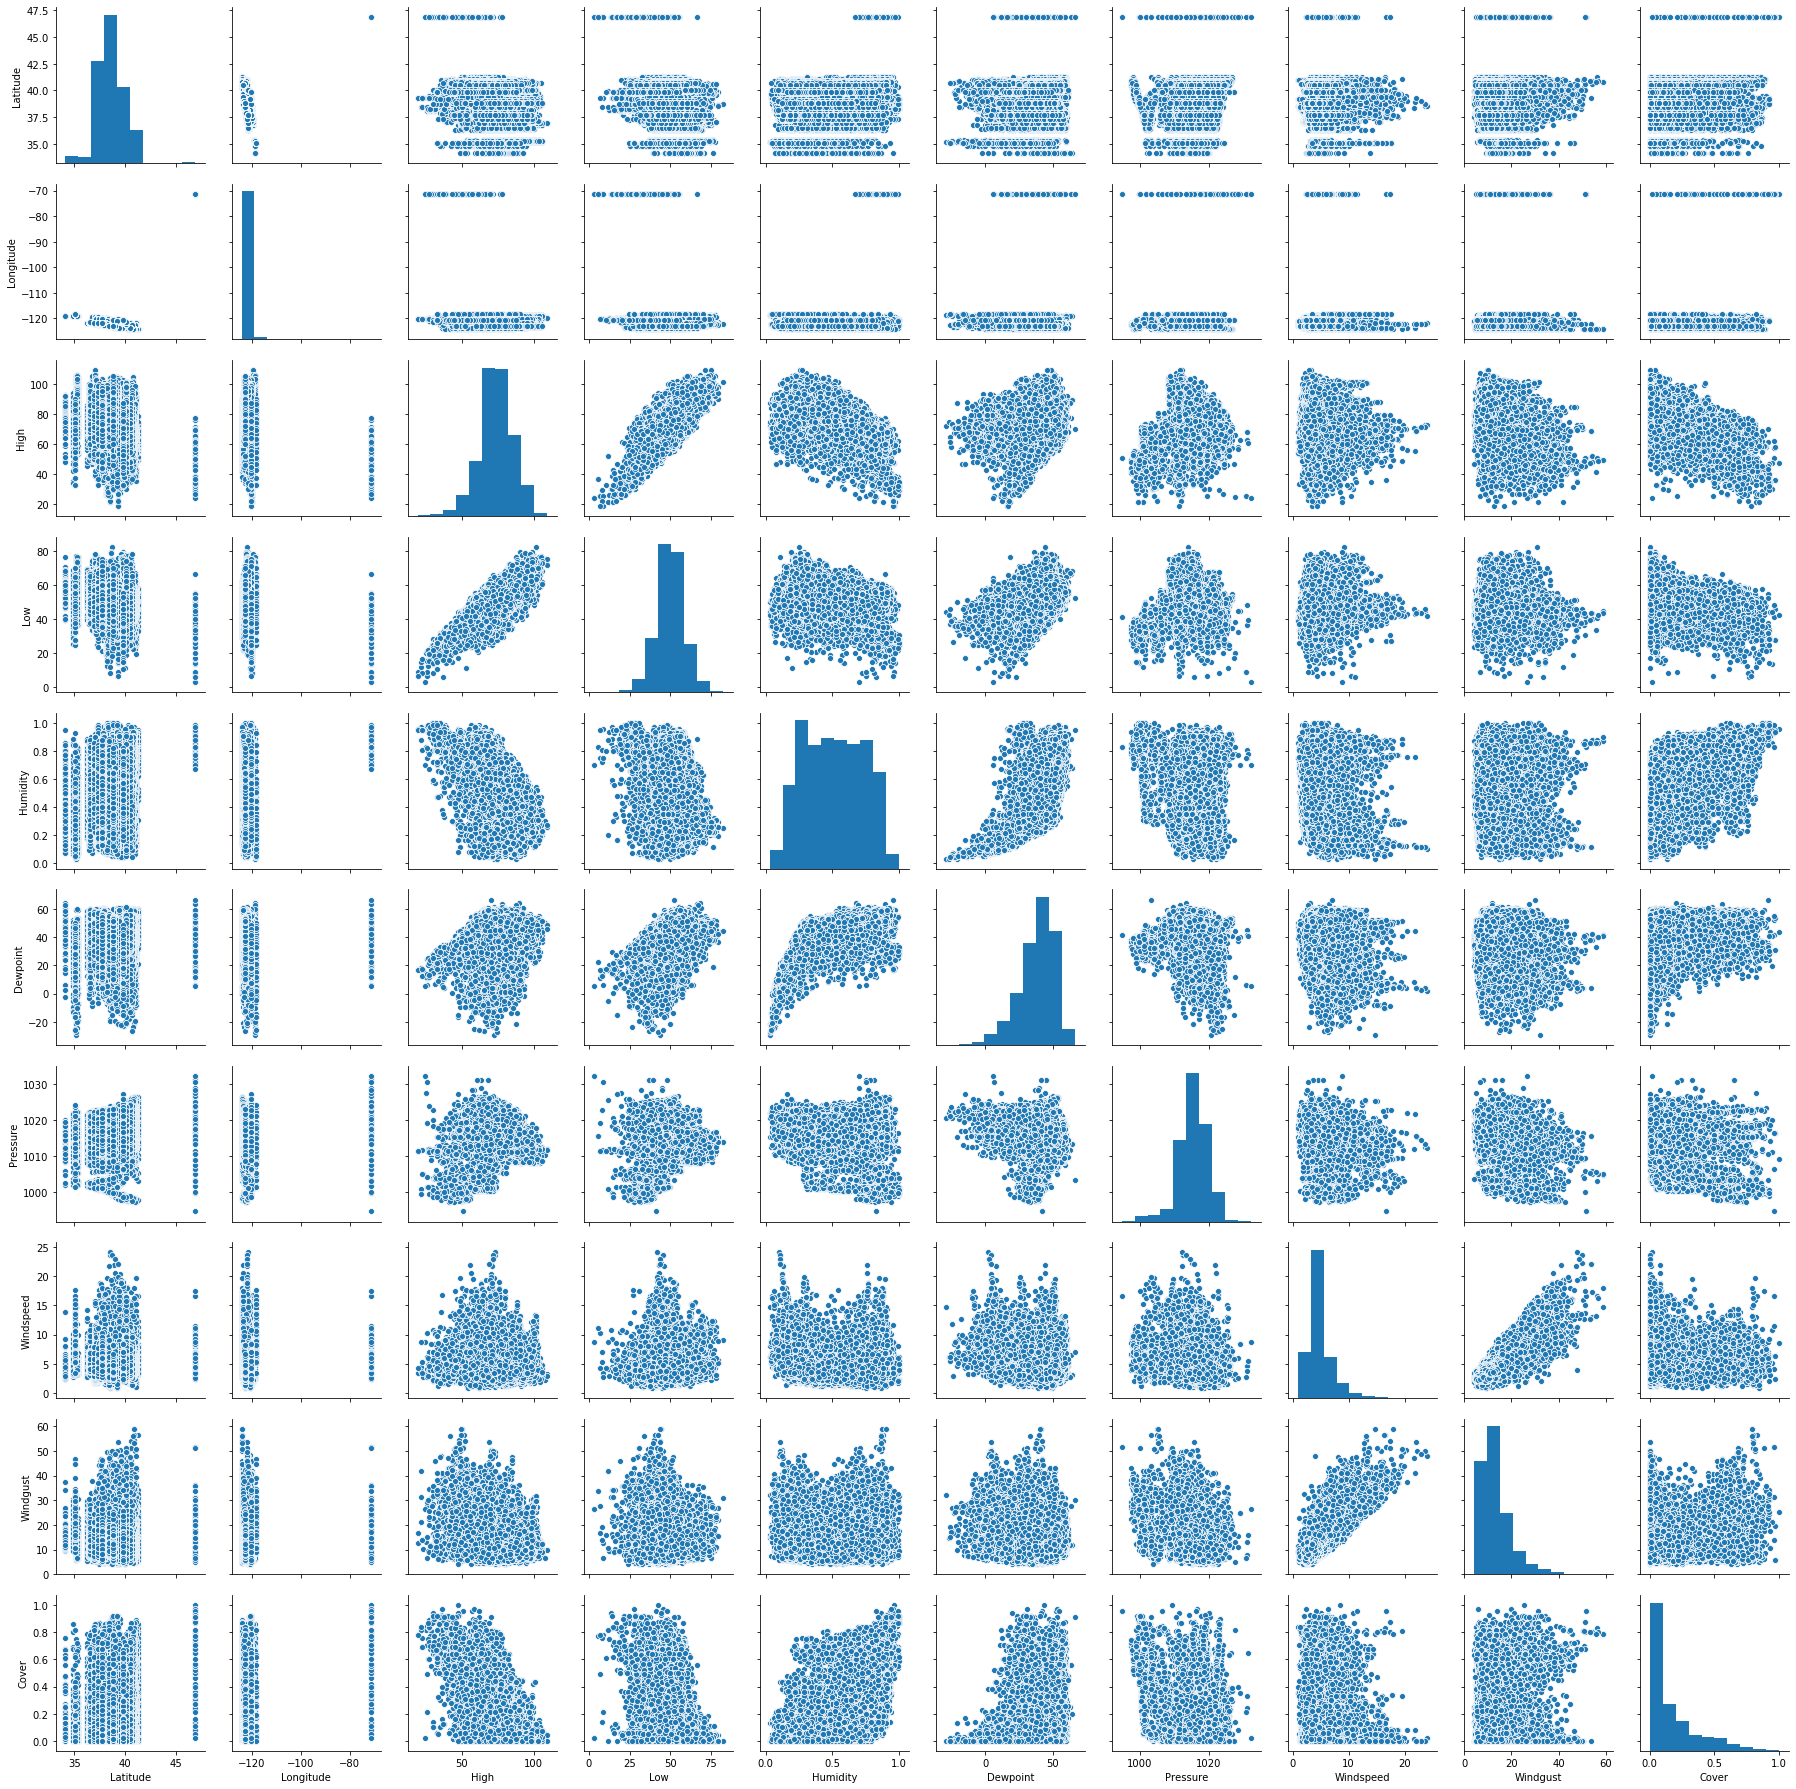

In [13]:
sns.pairplot(data_mask)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_mask, total_data.loc[:, 'Shutoff'], 
                                                    test_size = 0.2, random_state=22)

In [15]:
train_df = X_train.copy()
train_df['Shutoff'] = y_train.astype(int)

train_df['Power'] = train_df['Shutoff'].apply(lambda x: (x and 'Yes') or 'No')
train_df.head()

Key Communities Start Date   Latitude   Longitude End Date   High  \
13562          Coyote 2019-10-08  37.191182 -121.708145     None  89.82   
23529         Gualala 2019-09-07  38.772300 -123.534008     None  69.48   
12926      Myers Flat 2019-09-23  40.266412 -123.870084     None  76.14   
17716      Tuttletown 2019-11-10  37.991650 -120.460800     None  76.48   
17167         Belmont 2019-10-29  37.520215 -122.275801     None  69.64   

         Low  Humidity  Dewpoint  Pressure  Windspeed  Windgust  Cover  \
13562  57.93      0.23     29.94    1014.4       3.57      7.33   0.20   
23529  55.64      0.85     56.79    1018.4       9.16     19.25   0.32   
12926  53.63      0.81     57.49    1015.2       5.29     16.87   0.46   
17716  49.82      0.31     29.65    1019.2       1.99      9.77   0.00   
17167  46.50      0.18     14.02    1017.2       5.43     17.28   0.01   

       Shutoff Power  
13562        0    No  
23529        0    No  
12926        0    No  
17716        0    No  
17167        0    No

/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


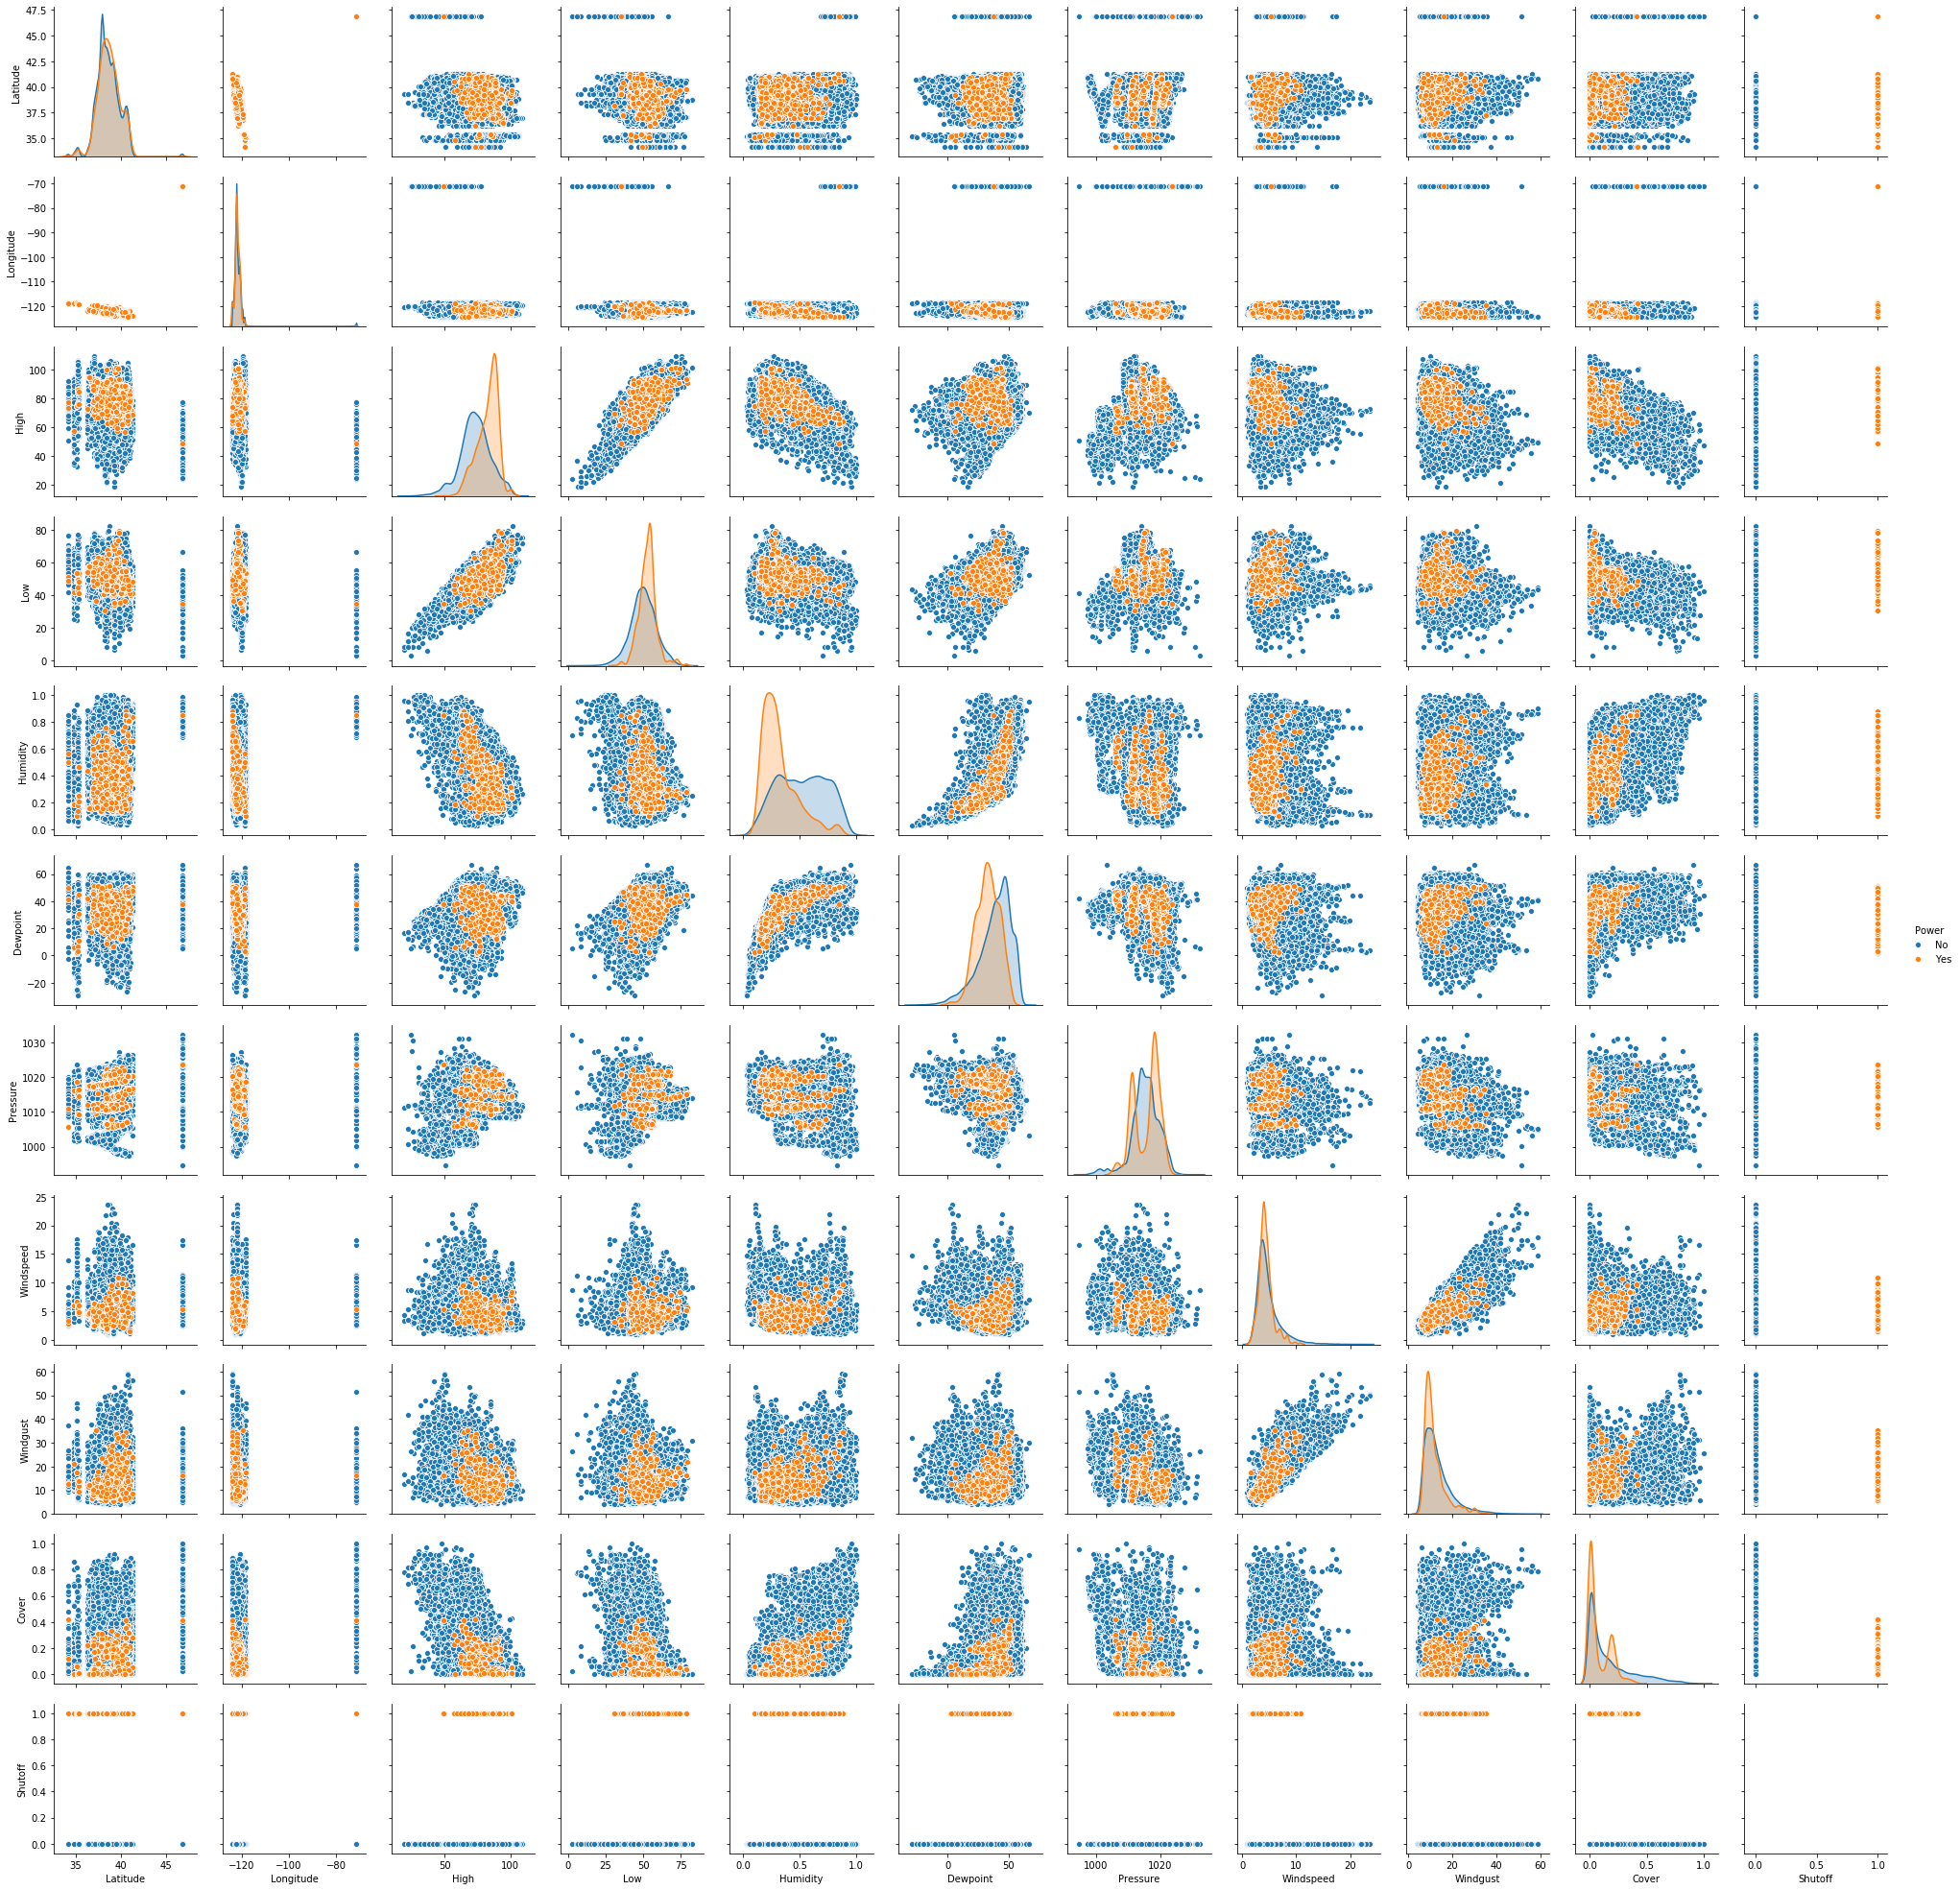

In [16]:
sns.pairplot(train_df, hue='Power');

In [17]:
#high, pressure, humidity
std_scale = StandardScaler()

X_train = train_df[['High', 'Humidity', 'Pressure']]
X_train_scaled = std_scale.fit_transform(X_train)

lm3 = LogisticRegression(solver='liblinear')
lm3.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_predict = lm3.predict(X_train_scaled)  # This is a hard classifier
lm3.score(X_train_scaled, y_train)

0.9496608045629348

Text(0.5, 1, 'LR Confusion Matrix')

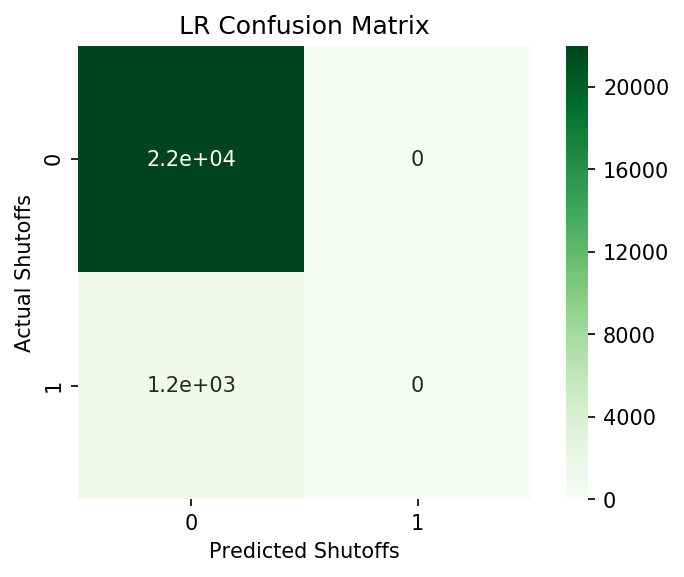

In [19]:

logit_confusion = confusion_matrix(y_train, y_predict)
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Greens, annot=True, square=True)
#            xticklabels=train_df['Power'],
#            yticklabels=train_df['Power'])

plt.xlabel('Predicted Shutoffs')
plt.ylabel('Actual Shutoffs')
plt.title('LR Confusion Matrix')
# logit_confusion
#plt.savefig("confusion_matrix_logit_iris")

In [20]:
train_df['Power'].value_counts()

No     21978
Yes     1165
Name: Power, dtype: int64

In [21]:
total_data

Key Communities Start Date  Shutoff   Latitude   Longitude  \
0              Bangor 2019-06-08     True  39.388612 -121.405314   
1              Bangor 2019-10-09     True  39.388612 -121.405314   
2              Bangor 2019-10-09     True  39.388612 -121.405314   
3              Bangor 2019-09-25     True  39.388612 -121.405314   
4              Bangor 2019-09-25     True  39.388612 -121.405314   
...               ...        ...      ...        ...         ...   
28924      Cloverdale 2019-09-10    False  38.805462 -123.017223   
28925      Cloverdale 2019-10-29    False  38.805462 -123.017223   
28926      Cloverdale 2019-09-04    False  38.805462 -123.017223   
28927      Cloverdale 2019-09-26    False  38.805462 -123.017223   
28928      Cloverdale 2019-10-10    False  38.805462 -123.017223   

                  End Date    High    Low  Humidity  Dewpoint  Pressure  \
0      2019-06-09 00:00:00   75.17  58.36      0.45     39.87    1014.9   
1      2019-10-11 00:00:00   83.72  47.69      0.30     37.69    1010.9   
2      2019-10-11 00:00:00   83.72  47.69      0.30     37.69    1010.9   
3      2019-09-25 00:00:00   98.17  72.84      0.25     44.27    1014.2   
4      2019-09-25 00:00:00   98.17  72.84      0.25     44.27    1014.2   
...                    ...     ...    ...       ...       ...       ...   
28924                 None   81.54  52.89      0.59     50.55    1013.8   
28925                 None   72.18  38.73      0.21     14.38    1017.2   
28926                 None   95.17  57.51      0.54     50.72    1014.3   
28927                 None  105.92  60.53      0.34     51.07    1008.8   
28928                 None   80.20  45.42      0.39     31.72    1012.9   

       Windspeed  Windgust  Cover  
0           5.53     22.28   0.07  
1           3.46      9.85   0.22  
2           3.46      9.85   0.22  
3           5.60     19.55   0.01  
4           5.60     19.55   0.01  
...          ...       ...    ...  
28924       6.69     15.95   0.14  
28925       3.34     10.81   0.01  
28926       3.46     12.71   0.12  
28927       3.51     12.32   0.07  
28928       4.71     15.82   0.01  

[28929 rows x 14 columns]